In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

x= generates 100 random numbers between 0 to 1  as 100 rows 1 column
then gets multiplied with 6 to bring them in range of [0,6) and then subtracted by for [-3,3)

for y a quadratic eqn is generated but it looks like a perfect one as it's graph will be a perfect symetry
to look like real data outliers are also introduced here


In [80]:
x=6 * np.random.rand(100,1) -3
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y')

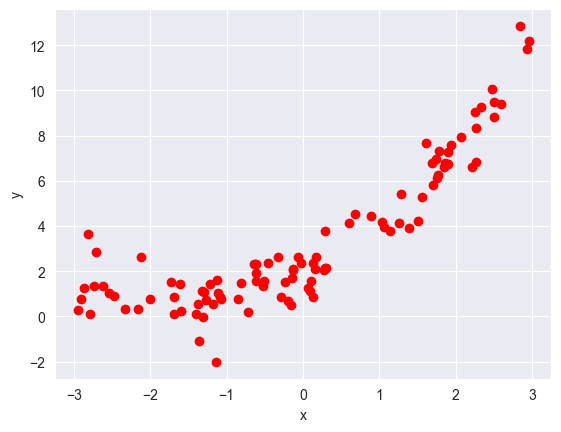

In [81]:
plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [84]:
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


here the score is 0.64 which is not a good one

In [85]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regressor.predict(x_test))
score

0.6457377011789511

Text(0, 0.5, 'Y')

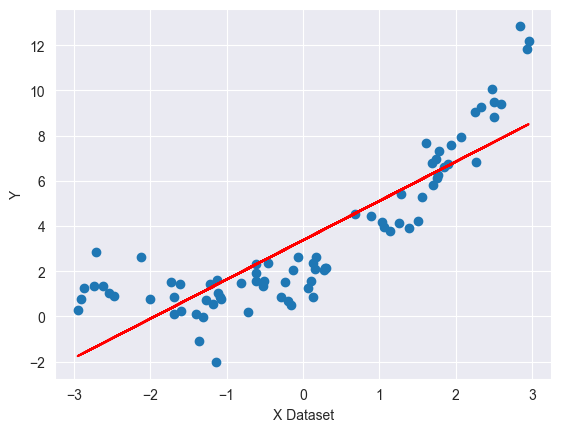

In [86]:
plt.plot(x_train,regressor.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

Applying Polynomial transformation

as here the data pattern is not aligning with the best fit line giving more errors so we need a curved line

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
poly=PolynomialFeatures(degree=2,include_bias=True)
# degree =2 here independent features->x so eqn = B*1+B*x+B*(x^2)   where 1 is the include_bias

In [89]:
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [90]:
x_train_poly

array([[ 1.00000000e+00,  1.60446941e-01,  2.57432207e-02],
       [ 1.00000000e+00,  2.70437177e-01,  7.31362665e-02],
       [ 1.00000000e+00,  6.47287481e-02,  4.18981083e-03],
       [ 1.00000000e+00, -2.71340140e+00,  7.36254715e+00],
       [ 1.00000000e+00, -1.27409105e+00,  1.62330802e+00],
       [ 1.00000000e+00,  2.49727573e+00,  6.23638605e+00],
       [ 1.00000000e+00, -1.30881764e+00,  1.71300362e+00],
       [ 1.00000000e+00, -1.27890981e-01,  1.63561031e-02],
       [ 1.00000000e+00, -5.18182284e-01,  2.68512879e-01],
       [ 1.00000000e+00,  1.60494539e+00,  2.57584970e+00],
       [ 1.00000000e+00, -8.13376895e-01,  6.61581973e-01],
       [ 1.00000000e+00, -1.91873612e-01,  3.68154830e-02],
       [ 1.00000000e+00,  9.82564088e-02,  9.65432188e-03],
       [ 1.00000000e+00,  1.02917220e+00,  1.05919542e+00],
       [ 1.00000000e+00,  1.38228995e+00,  1.91072552e+00],
       [ 1.00000000e+00, -2.86170594e+00,  8.18936089e+00],
       [ 1.00000000e+00, -1.17735965e+00

In [91]:
x_test_poly

array([[ 1.00000000e+00, -1.29281571e+00,  1.67137246e+00],
       [ 1.00000000e+00,  1.85804376e+00,  3.45232661e+00],
       [ 1.00000000e+00, -2.78695972e+00,  7.76714447e+00],
       [ 1.00000000e+00, -2.74223916e-02,  7.51987560e-04],
       [ 1.00000000e+00,  1.90110028e+00,  3.61418227e+00],
       [ 1.00000000e+00, -8.44179894e-01,  7.12639694e-01],
       [ 1.00000000e+00,  5.99802596e-01,  3.59763154e-01],
       [ 1.00000000e+00, -3.23234293e-01,  1.04480408e-01],
       [ 1.00000000e+00,  2.93372037e-01,  8.60671523e-02],
       [ 1.00000000e+00,  2.21386733e+00,  4.90120853e+00],
       [ 1.00000000e+00,  8.50446169e-02,  7.23258687e-03],
       [ 1.00000000e+00, -6.45022093e-01,  4.16053501e-01],
       [ 1.00000000e+00, -2.33195779e+00,  5.43802714e+00],
       [ 1.00000000e+00,  2.26686837e+00,  5.13869221e+00],
       [ 1.00000000e+00, -1.37546782e+00,  1.89191173e+00],
       [ 1.00000000e+00, -1.29703958e-01,  1.68231167e-02],
       [ 1.00000000e+00, -1.44373349e-01

here the accuracy has been increased from 0.64 to 0.84

In [92]:
regressor=LinearRegression()
regressor.fit(x_train_poly,y_train)
y_pred=regressor.predict(x_test_poly)
score=r2_score(y_test,y_pred)
score

0.8488710268760583

In [93]:
regressor.coef_

array([[0.        , 1.69773615, 0.5669587 ]])

In [94]:
regressor.intercept_

array([1.8248918])

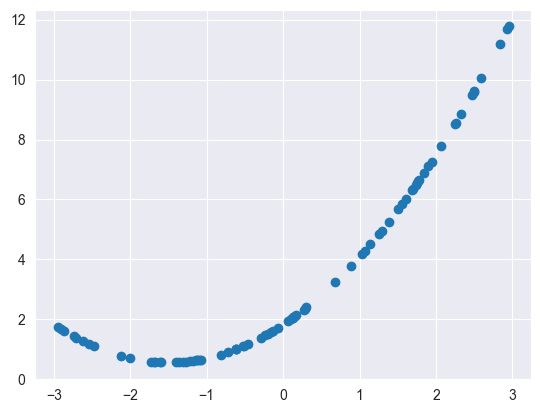

In [101]:
plt.scatter(x_train,regressor.predict(x_train_poly))

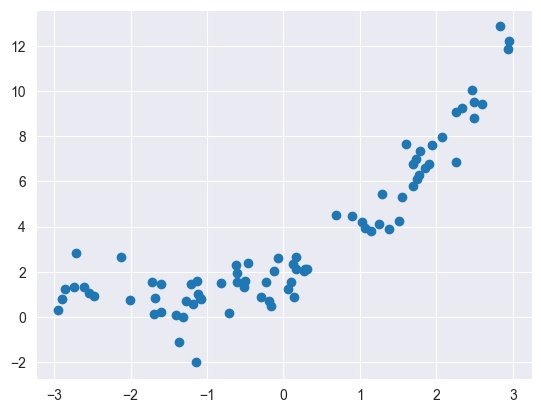

In [102]:
plt.scatter(x_train,y_train)

let's try to increase the accuracy

In [106]:
poly=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [107]:
x_train_poly

array([[ 1.00000000e+00,  1.60446941e-01,  2.57432207e-02,
         4.13042101e-03],
       [ 1.00000000e+00,  2.70437177e-01,  7.31362665e-02,
         1.97787654e-02],
       [ 1.00000000e+00,  6.47287481e-02,  4.18981083e-03,
         2.71201210e-04],
       [ 1.00000000e+00, -2.71340140e+00,  7.36254715e+00,
        -1.99775457e+01],
       [ 1.00000000e+00, -1.27409105e+00,  1.62330802e+00,
        -2.06824222e+00],
       [ 1.00000000e+00,  2.49727573e+00,  6.23638605e+00,
         1.55739755e+01],
       [ 1.00000000e+00, -1.30881764e+00,  1.71300362e+00,
        -2.24200937e+00],
       [ 1.00000000e+00, -1.27890981e-01,  1.63561031e-02,
        -2.09179808e-03],
       [ 1.00000000e+00, -5.18182284e-01,  2.68512879e-01,
        -1.39138617e-01],
       [ 1.00000000e+00,  1.60494539e+00,  2.57584970e+00,
         4.13409809e+00],
       [ 1.00000000e+00, -8.13376895e-01,  6.61581973e-01,
        -5.38115491e-01],
       [ 1.00000000e+00, -1.91873612e-01,  3.68154830e-02,
      

In [109]:
x_test_poly

array([[ 1.00000000e+00, -1.29281571e+00,  1.67137246e+00,
        -2.16077657e+00],
       [ 1.00000000e+00,  1.85804376e+00,  3.45232661e+00,
         6.41457390e+00],
       [ 1.00000000e+00, -2.78695972e+00,  7.76714447e+00,
        -2.16467188e+01],
       [ 1.00000000e+00, -2.74223916e-02,  7.51987560e-04,
        -2.06212973e-05],
       [ 1.00000000e+00,  1.90110028e+00,  3.61418227e+00,
         6.87092292e+00],
       [ 1.00000000e+00, -8.44179894e-01,  7.12639694e-01,
        -6.01596102e-01],
       [ 1.00000000e+00,  5.99802596e-01,  3.59763154e-01,
         2.15786873e-01],
       [ 1.00000000e+00, -3.23234293e-01,  1.04480408e-01,
        -3.37716510e-02],
       [ 1.00000000e+00,  2.93372037e-01,  8.60671523e-02,
         2.52496958e-02],
       [ 1.00000000e+00,  2.21386733e+00,  4.90120853e+00,
         1.08506254e+01],
       [ 1.00000000e+00,  8.50446169e-02,  7.23258687e-03,
         6.15092580e-04],
       [ 1.00000000e+00, -6.45022093e-01,  4.16053501e-01,
      

here the accuracy remains approx same

In [111]:
regressor.fit(x_train_poly, y_train)
y_pred = regressor.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8454178039798977


drawing the smooth regression curve that the model has learned, so we can compare it against the scattered training/testing points.

In [112]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1) #gives 200 smooth, equally spaced inputs.
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

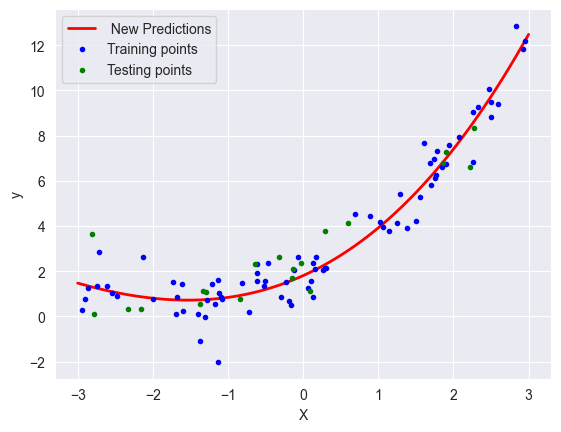

In [117]:
y_new = regressor.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Pipeline Concept

In [118]:
from sklearn.pipeline import Pipeline

In [120]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

we should select a degree which does not overfit

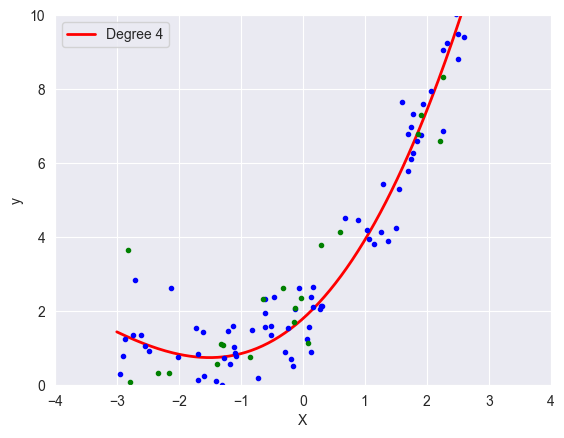

In [134]:
poly_regression(4)